In [2]:
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install mathplotlib
!pip install statsmodels


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#Preprocessing
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#Dropping the nulls
df = df.dropna(axis=1)

In [9]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [10]:
df.shape

(1460, 62)

In [11]:
#The columns the is left after dropping the nulls
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [12]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

In [13]:
#Data Understanding
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

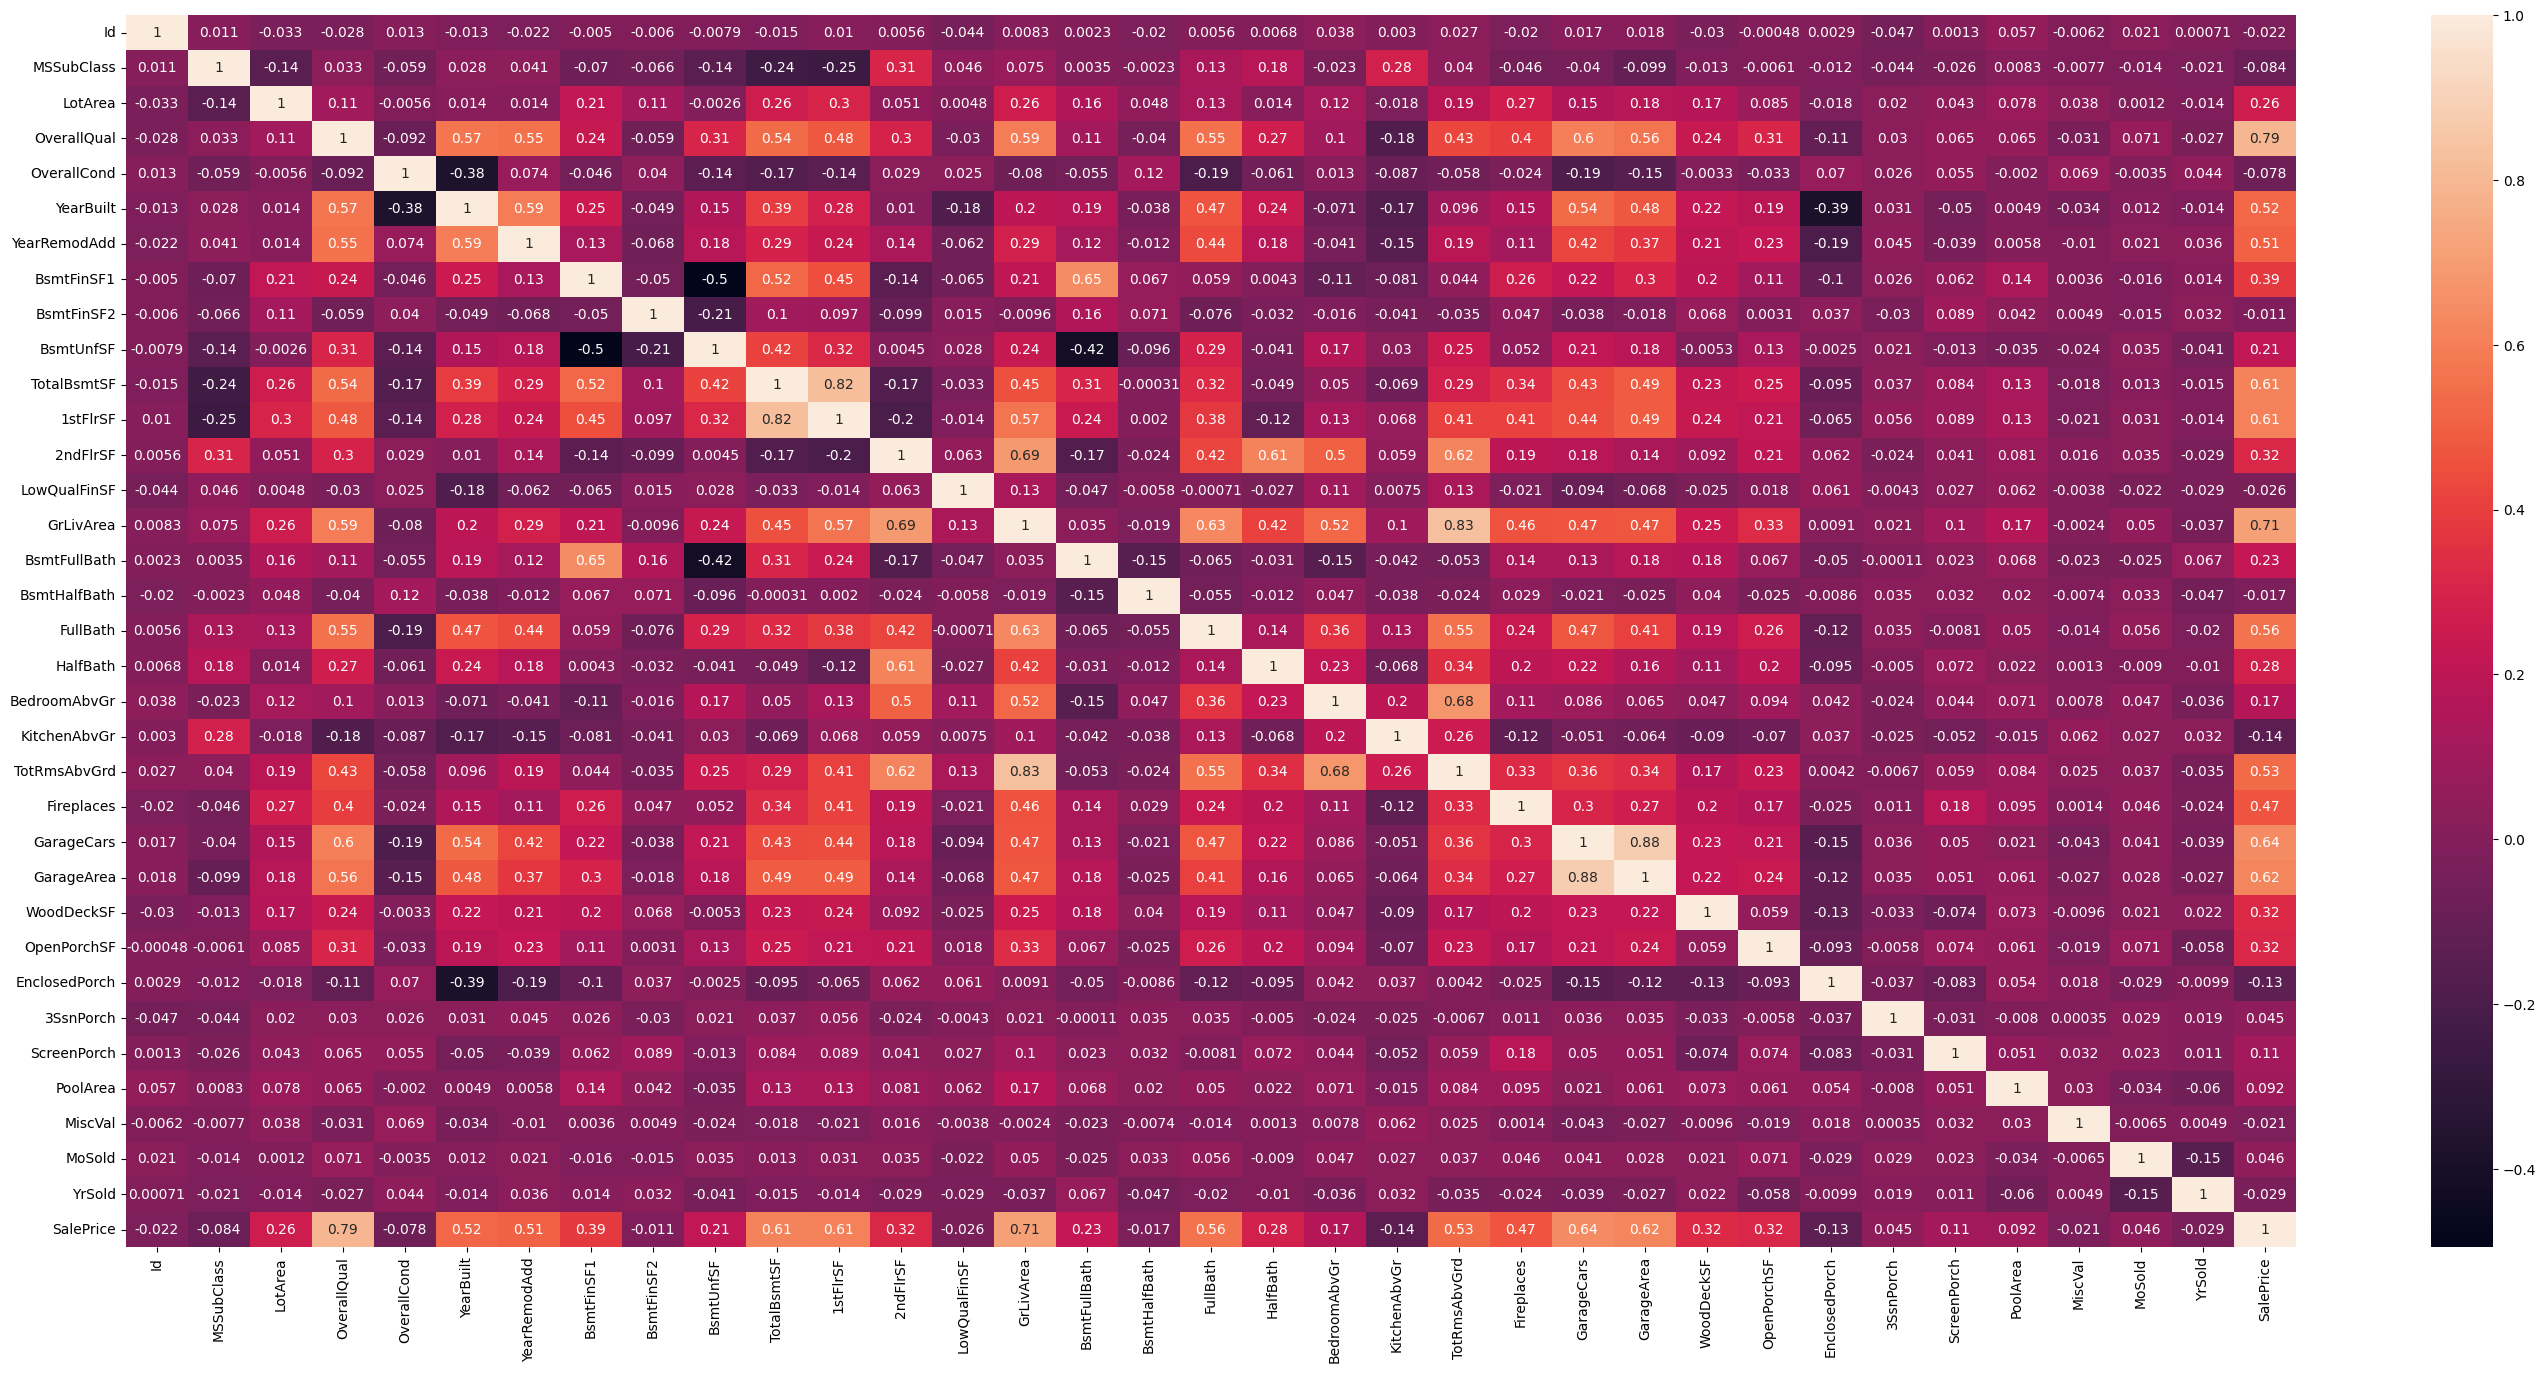

In [14]:
#Data understanding
plt.subplots(figsize=(35, 16))
corr = df.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

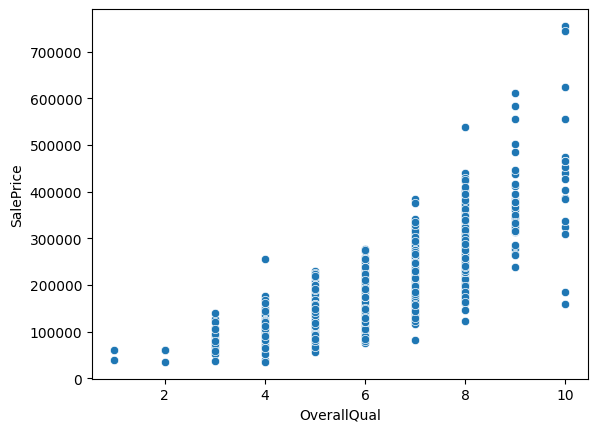

In [15]:
# check to see if there is a linear relationship
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

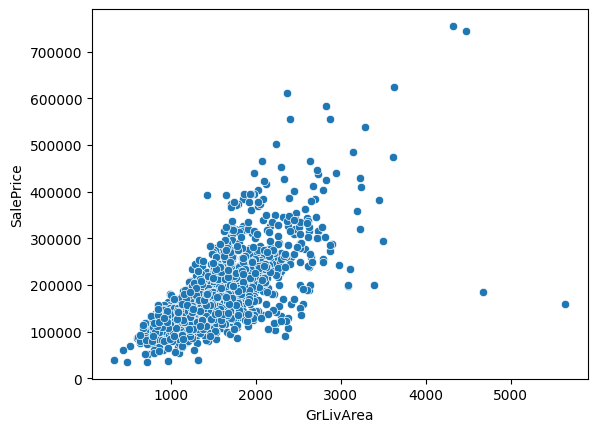

In [16]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

# Experiment 1

In [17]:
#Creating model
from sklearn.model_selection import train_test_split

In [18]:
#The target is SalePrice 
y = df['SalePrice']
X = df[['OverallQual', 'GrLivArea']]

In [19]:
#Train linear regression
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [20]:
#Look at the shape
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1095, 2), (1095,), (365, 2), (365,))

In [21]:
reg = LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
reg.score(X, y)

0.712810031899801

In [23]:
# The coefficients and intercept
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [33207.45169299    49.86753889]
Intercept: 
 -97728.8930635034


In [24]:
import statsmodels.api as sma

In [25]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model = lr.fit(x_train, y_train)

In [26]:
X2 = sma.add_constant(x_train)

est = sma.OLS(y_train, X2)
est2 = est.fit()

est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1269.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          1.55e-285
Time:                        17:32:55   Log-Likelihood:                -13214.
No. Observations:                1095   AIC:                         2.643e+04
Df Residuals:                    1092   BIC:                         2.645e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.773e+04   5818.684    -16.796      0.000   -1.09e+05   -8.63e+04
OverallQual  3.321e+04   1129.471     29.401      0.000     3.1e+04    3.54e+04
GrLivArea      49.8675      2.975     16.765      0.000      44.031      55.704
==============================================================================
Omnibus:                      251.156   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7064.467
Skew:                           0.366   Prob(JB):                         0.00
Kurtosis:                      15.422   Cond. No.                     7.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Evaluate Model
from sklearn.metrics import mean_squared_error

In [28]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

1918274325.4412367

find the root mean squared error.

In [29]:
np.sqrt(mse)

43798.108697080024

In [30]:
#Model Intercept and Model Slope 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Coefficient of determination
print('Coefficient of Determination:',lr_model.score(x_test, y_test))

Model Intercept: -97728.8930635034
Model Slope: 33207.45169298844
Coefficient of Determination: 0.7448209416219029


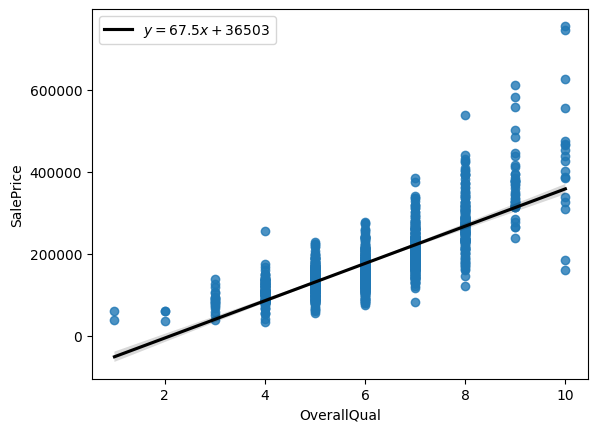

In [68]:
plot = sns.regplot(data = df,x="OverallQual", y="SalePrice",line_kws={'color':'black','label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()

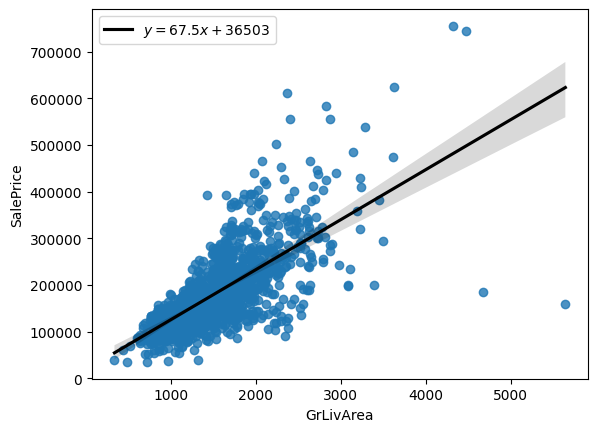

In [67]:
plot = sns.regplot(data = df,x="GrLivArea", y="SalePrice",line_kws={'color':'black','label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()

## Experiment 2

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

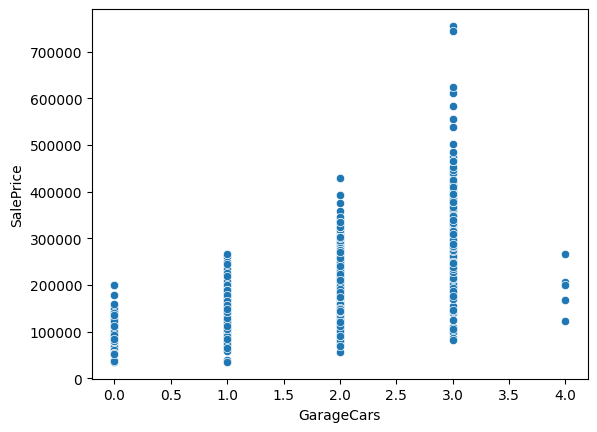

In [33]:
# check to see if there is a linear relationship
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

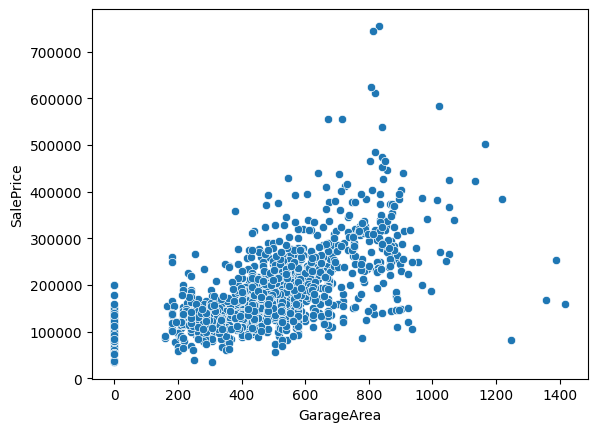

In [34]:
# check to see if there is a linear relationship
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)

In [35]:
#The target is SalePrice 
y = df['SalePrice']
X = df[['GarageCars','GarageArea']]

In [36]:
#Train linear regression
x_train, x_test, y_train, y_test = train_test_split(X, y)


In [37]:
#Look at the shape
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1095, 2), (1095,), (365, 2), (365,))

In [38]:
x_test.shape

(365, 2)

In [39]:
reg = LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [40]:
reg.score(X, y)

0.42533171036607276

In [41]:
# The coefficients
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [42275.88053406   105.08657791]
Intercept: 
 56846.90867792406


In [42]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model = lr.fit(x_train, y_train)

In [43]:
X2 = sma.add_constant(x_train)

est = sma.OLS(y_train, X2)
est2 = est.fit()

est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     409.4
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          2.10e-133
Time:                        17:32:56   Log-Likelihood:                -13614.
No. Observations:                1095   AIC:                         2.723e+04
Df Residuals:                    1092   BIC:                         2.725e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.685e+04   4792.410     11.862      0.000    4.74e+04    6.63e+04
GarageCars  4.228e+04   5114.737      8.266      0.000    3.22e+04    5.23e+04
GarageArea   105.0866     17.888      5.875      0.000      69.988     140.186
==============================================================================
Omnibus:                      467.027   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4243.482
Skew:                           1.721   Prob(JB):                         0.00
Kurtosis:                      12.009   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#Evaluate Model
from sklearn.metrics import mean_squared_error

In [45]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

3435694157.5332713

In [46]:
np.sqrt(mse)

58614.7946983803

In [47]:
#Model Intercept and Model Slope 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Coefficient of determination
print('Coefficient of Determination:',lr_model.score(x_test, y_test))

Model Intercept: 56846.90867792406
Model Slope: 42275.880534058306
Coefficient of Determination: 0.40971540203358603


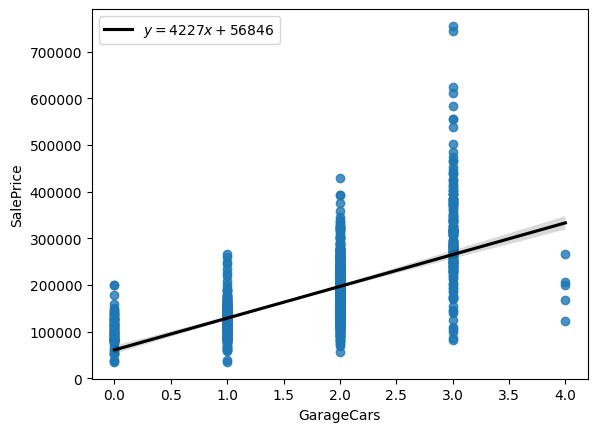

In [48]:
plot = sns.regplot(data = df,x="GarageCars", y="SalePrice",line_kws={'color':'black','label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()

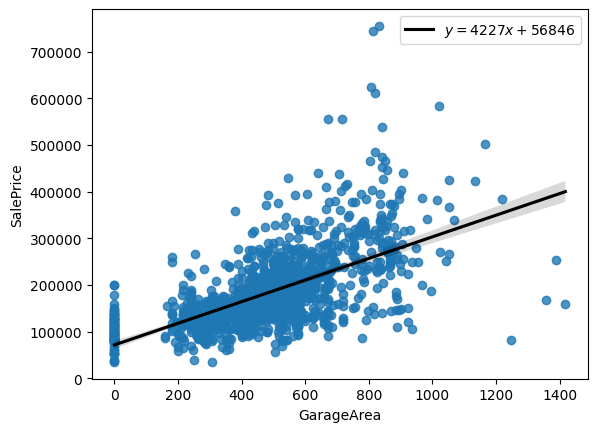

In [49]:
plot = sns.regplot(data = df,x="GarageArea", y="SalePrice",line_kws={'color':'black','label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()

# Experiment 3

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

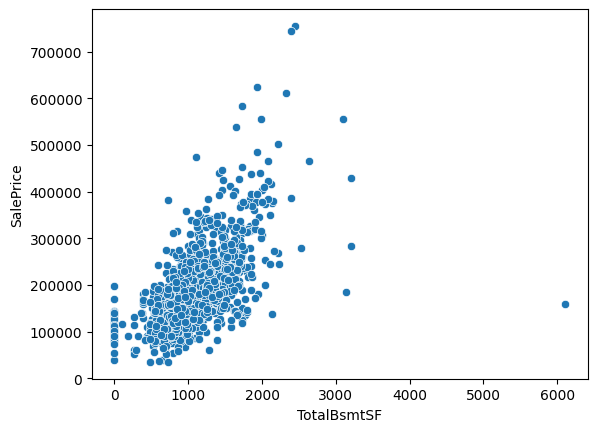

In [50]:
# check to see if there is a linear relationship
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

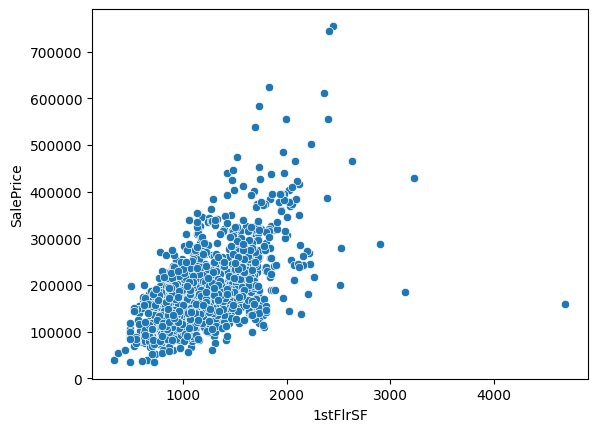

In [51]:
# check to see if there is a linear relationship
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df)

In [52]:
#The target is SalePrice 
y = df['SalePrice']
X = df[['TotalBsmtSF','1stFlrSF']]

In [53]:
#Train linear regression
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [54]:
#Look at the shape
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1095, 2), (1095,), (365, 2), (365,))

In [55]:
reg = LinearRegression() 
reg.fit(x_train, y_train)

LinearRegression()

In [56]:
reg.score(X, y)

0.40817368456210557

In [57]:
# The coefficients and intercept
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [67.50579752 64.16714484]
Intercept: 
 36503.1192316665


In [58]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model = lr.fit(x_train, y_train)

In [59]:
X2 = sma.add_constant(x_train)

est = sma.OLS(y_train, X2)
est2 = est.fit()

est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     389.9
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          1.65e-128
Time:                        17:32:57   Log-Likelihood:                -13651.
No. Observations:                1095   AIC:                         2.731e+04
Df Residuals:                    1092   BIC:                         2.732e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.65e+04   5998.316      6.086      0.000    2.47e+04    4.83e+04
TotalBsmtSF    67.5058      7.257      9.302      0.000      53.266      81.746
1stFlrSF       64.1671      8.373      7.664      0.000      47.738      80.596
==============================================================================
Omnibus:                      294.715   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6379.105
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                      14.743   Cond. No.                     5.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
#Evaluate Model
from sklearn.metrics import mean_squared_error

In [61]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

3101345599.8602233

find the root mean squared error.

In [62]:
np.sqrt(mse)

55689.72616075808

In [63]:
#Model Intercept and Model Slope 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Coefficient of determination
print('Coefficient of Determination:',lr_model.score(x_test, y_test))

Model Intercept: 36503.1192316665
Model Slope: 67.50579752142085
Coefficient of Determination: 0.36270996452490556


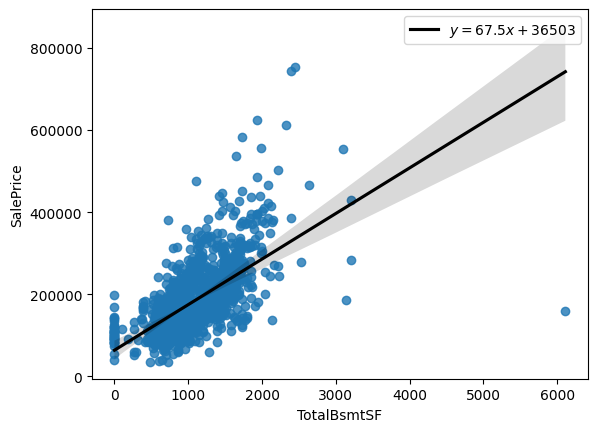

In [64]:
plot = sns.regplot(data = df,x="TotalBsmtSF", y="SalePrice",line_kws={'color':'black','label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()

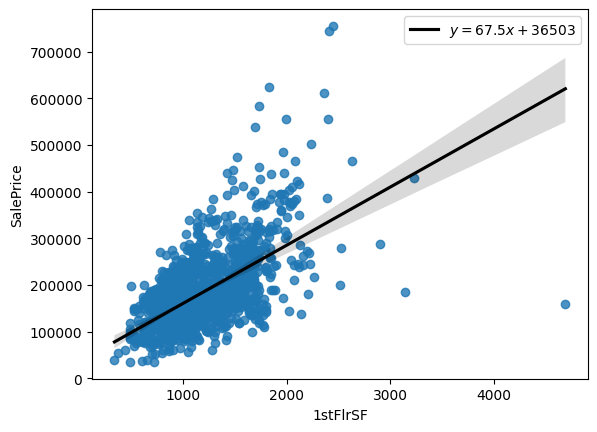

In [65]:
plot = sns.regplot(data = df,x="1stFlrSF", y="SalePrice",line_kws={'color':'black','label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()